Creating the original model and training it on the MNIST Dataset

In [217]:
from tensorflow.keras.datasets import mnist

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
%matplotlib inline

In [219]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [220]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

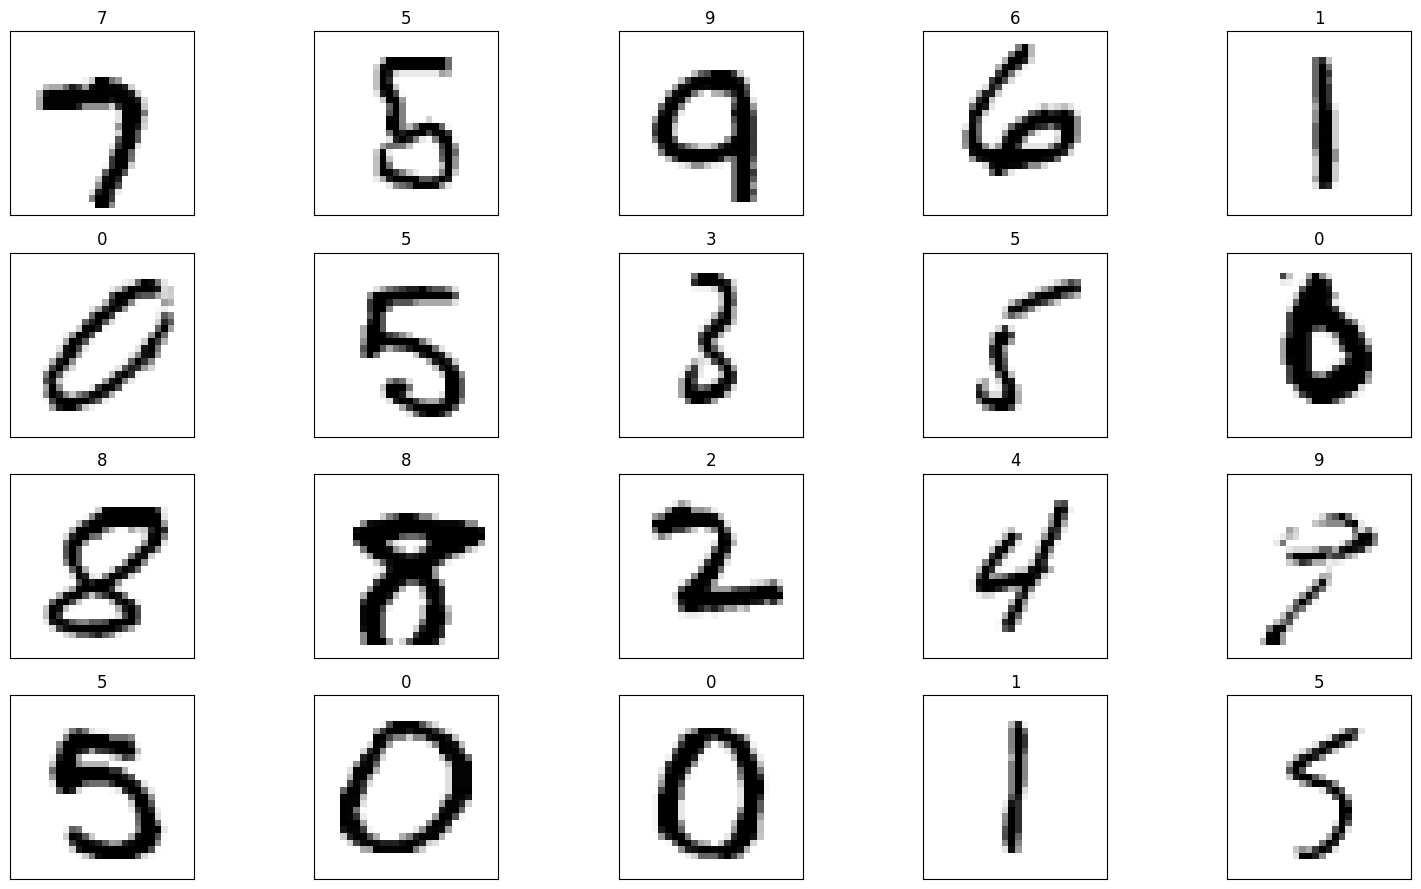

In [221]:
# Displaying random set of images from the data
index = np.random.choice(np.arange(len(X_train)), 20, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(16,9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [222]:
# Reshaping data to be compatible with Keras convnets
X_train = X_train.reshape((60000,28,28,1))

In [223]:
X_train.shape

(60000, 28, 28, 1)

In [224]:
X_test = X_test.reshape((10000,28,28,1))

In [225]:
X_test.shape

(10000, 28, 28, 1)

In [226]:
# Normalizing data
X_train = X_train.astype('float32')/255 # Dividing by 255 bc each pixel is an integer in the range 0-255
X_test = X_test.astype('float32')/255

In [227]:
# One-hot encoding on the labels so that their shape matches the shape of Keras predictions
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [228]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [229]:
# Create neural network
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [230]:
# Importing layer classes
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [231]:
# First convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [232]:
# First pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [233]:
# Second convolution layer
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [234]:
# Second pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [235]:
cnn.add(Flatten())

In [236]:
cnn.add(Dense(units=128, activation='relu'))

In [237]:
cnn.add(Dense(units=10, activation='softmax'))

In [238]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 3200)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [239]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [240]:
# Training the model
start_time_digits = time.time()
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
time_digits = time.time() - start_time_digits

Epoch 1/5
844/844 [==============================] - 12s 14ms/step - loss: 0.1439 - accuracy: 0.9556 - val_loss: 0.0507 - val_accuracy: 0.9860
Epoch 2/5
844/844 [==============================] - 11s 13ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 3/5
844/844 [==============================] - 11s 13ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0365 - val_accuracy: 0.9902
Epoch 4/5
844/844 [==============================] - 11s 13ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0429 - val_accuracy: 0.9887
Epoch 5/5
844/844 [==============================] - 11s 13ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0405 - val_accuracy: 0.9908


In [241]:
loss_digits, accuracy_digits = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9897


In [242]:
loss_digits

0.03614532947540283

In [243]:
accuracy_digits

0.9897000193595886

Homework part 1: Comparing accuracy and training time with Fashion-MNIST

In [244]:
from tensorflow.keras.datasets import fashion_mnist

In [245]:
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

In [246]:
X_train_fashion.shape, y_train_fashion.shape, X_test_fashion.shape, y_test_fashion.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

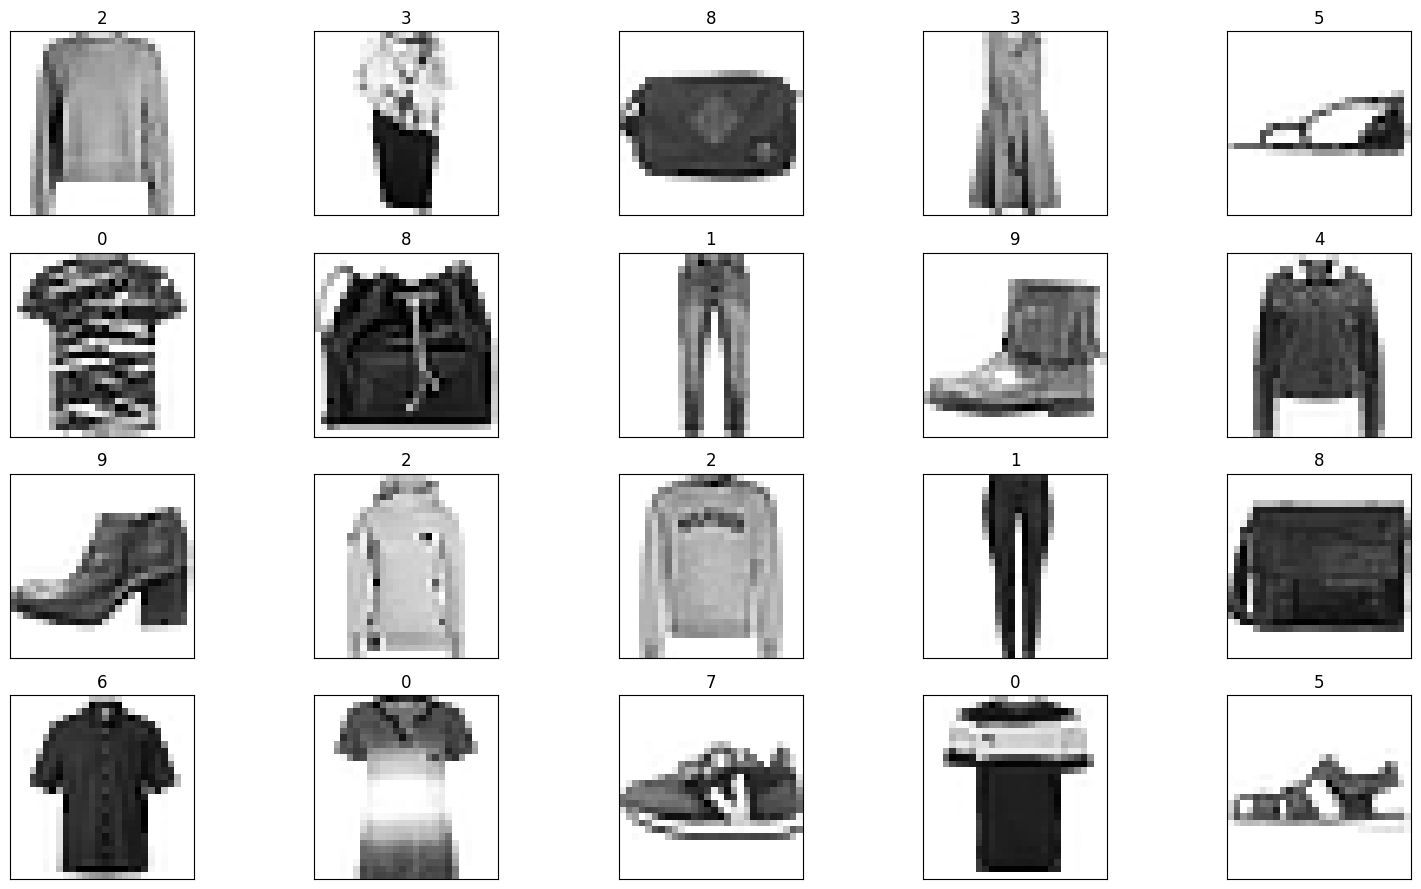

In [247]:
# Displaying random set of images from the data
index = np.random.choice(np.arange(len(X_train_fashion)), 20, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(16,9))

for item in zip(axes.ravel(), X_train_fashion[index], y_train_fashion[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [248]:
# Reshaping data to be compatible with Keras convnets
X_train_fashion = X_train_fashion.reshape((60000,28,28,1))

In [249]:
X_train_fashion.shape

(60000, 28, 28, 1)

In [250]:
X_test_fashion = X_test_fashion.reshape((10000,28,28,1))

In [251]:
X_test_fashion.shape

(10000, 28, 28, 1)

In [252]:
# Normalizing data
X_train_fashion = X_train_fashion.astype('float32')/255 # Dividing by 255 bc each pixel is an integer in the range 0-255
X_test_fashion = X_test_fashion.astype('float32')/255

In [253]:
# One-hot encoding on the labels so that their shape matches the shape of Keras predictions
y_train_fashion = to_categorical(y_train_fashion)
y_test_fashion = to_categorical(y_test_fashion)

In [254]:
y_train_fashion.shape, y_test_fashion.shape

((60000, 10), (10000, 10))

In [255]:
# Create neural network
cnn_fashion = Sequential()

In [256]:
# First convolution layer
cnn_fashion.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [257]:
# First pooling layer
cnn_fashion.add(MaxPooling2D(pool_size=(2,2)))

In [258]:
# Second convolution layer
cnn_fashion.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [259]:
# Second pooling layer
cnn_fashion.add(MaxPooling2D(pool_size=(2,2)))

In [260]:
cnn_fashion.add(Flatten())

In [261]:
cnn_fashion.add(Dense(units=128, activation='relu'))

In [262]:
cnn_fashion.add(Dense(units=10, activation='softmax'))

In [263]:
cnn_fashion.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 3200)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [264]:
cnn_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [265]:
# Training the model
start_time_fashion = time.time()
cnn_fashion.fit(X_train_fashion, y_train_fashion, epochs=5, batch_size=64, validation_split=0.1)
time_fashion = time.time() - start_time_fashion

Epoch 1/5
844/844 [==============================] - 12s 14ms/step - loss: 0.4809 - accuracy: 0.8276 - val_loss: 0.3520 - val_accuracy: 0.8723
Epoch 2/5
844/844 [==============================] - 11s 13ms/step - loss: 0.3133 - accuracy: 0.8863 - val_loss: 0.2905 - val_accuracy: 0.8935
Epoch 3/5
844/844 [==============================] - 11s 13ms/step - loss: 0.2651 - accuracy: 0.9043 - val_loss: 0.3004 - val_accuracy: 0.8877
Epoch 4/5
844/844 [==============================] - 11s 13ms/step - loss: 0.2315 - accuracy: 0.9142 - val_loss: 0.2506 - val_accuracy: 0.9078
Epoch 5/5
844/844 [==============================] - 11s 13ms/step - loss: 0.2022 - accuracy: 0.9253 - val_loss: 0.2378 - val_accuracy: 0.9115


In [266]:
loss_fashion, accuracy_fashion = cnn_fashion.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 4ms/step - loss: 0.2581 - accuracy: 0.9061


In [267]:
loss_fashion

0.25813934206962585

In [268]:
accuracy_fashion

0.9060999751091003

In [269]:
print(f'Accuracy for MNIST: {accuracy_digits}\nAccuracy for Fashion-MNIST: {accuracy_fashion}')
print(f'Train time for MNIST: {time_digits}\nTrain time for Fashion-MNIST: {time_fashion}')

Accuracy for MNIST: 0.9897000193595886
Accuracy for Fashion-MNIST: 0.9060999751091003
Train time for MNIST: 57.699066400527954
Train time for Fashion-MNIST: 56.660295248031616


Homework part 2: Add additional Dense layer with 4096 neurons to original model and train on MNIST dataset, then compare accuracy and training time

In [270]:
cnn_4096 = Sequential()

In [271]:
# First convolution layer
cnn_4096.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [272]:
# First pooling layer
cnn_4096.add(MaxPooling2D(pool_size=(2,2)))

In [273]:
# Second convolution layer
cnn_4096.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [274]:
# Second pooling layer
cnn_4096.add(MaxPooling2D(pool_size=(2,2)))

In [275]:
cnn_4096.add(Flatten())

In [276]:
# New Dense layer
cnn_4096.add(Dense(units=4096, activation='relu'))

In [277]:
cnn_4096.add(Dense(units=128, activation='relu'))

In [278]:
cnn_4096.add(Dense(units=10, activation='softmax'))

In [279]:
cnn_4096.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 3200)              0         
                                                                 
 dense_18 (Dense)            (None, 4096)             

In [280]:
cnn_4096.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [281]:
# Training the model
start_time_4096 = time.time()
cnn_4096.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
time_4096 = time.time() - start_time_4096

Epoch 1/5
844/844 [==============================] - 59s 69ms/step - loss: 0.1165 - accuracy: 0.9642 - val_loss: 0.0426 - val_accuracy: 0.9872
Epoch 2/5
844/844 [==============================] - 58s 69ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0474 - val_accuracy: 0.9875
Epoch 3/5
844/844 [==============================] - 59s 69ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 4/5
844/844 [==============================] - 59s 69ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 59s 70ms/step - loss: 0.0168 - accuracy: 0.9951 - val_loss: 0.0317 - val_accuracy: 0.9918


In [282]:
loss_4096, accuracy_4096 = cnn_4096.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0336 - accuracy: 0.9901


In [283]:
loss_4096

0.03356610983610153

In [284]:
accuracy_4096

0.9901000261306763

In [285]:
print(f'Accuracy for MNIST: {accuracy_digits}\nAccuracy for MNIST with 4096 neuron Dense layer: {accuracy_4096}')
print(f'Train time for MNIST: {time_digits}\nTrain time for MNIST with 4096 neuron Dense layer:: {time_4096}')

Accuracy for MNIST: 0.9897000193595886
Accuracy for MNIST with 4096 neuron Dense layer: 0.9901000261306763
Train time for MNIST: 57.699066400527954
Train time for MNIST with 4096 neuron Dense layer:: 293.6380820274353
